In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/
Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/yolo5

/content/gdrive/My Drive/yolo5


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

In [ ]:
!pip install PyYAML==5.4.1

     |████████████████████████████████| 636 kB 4.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install wandb

     |████████████████████████████████| 1.6 MB 4.2 MB/s 
     |████████████████████████████████| 170 kB 50.5 MB/s 
     |████████████████████████████████| 133 kB 50.5 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=22acd0e420e9144a5069b421dcd8f88b5b8af556004191e8c0342f951797a9f6
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=e6b8c253dc1a48b24b46c296ef1194c8416387c52b7f5b6b6dda2d1f624b4aff
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


### training result visualization 
-  View project at https://wandb.ai/rachelwang/YOLOv5
-  View run at https://wandb.ai/rachelwang/YOLOv5/runs/1s5zbwvm

my account name : rachelwang

Yolov5自带在线数据增强，也就是说，每个Epoch中的数据，都是经过数据增强后的，实现一个泛化能力
马赛克数据增强确实能有效解决模型训练中最头疼的“小对象问题”，即小对象不如大对象那样准确地被检测到

In [ ]:
#freeze = ['model.%s.' % x for x in range(10)]  # parameter names to freeze (full or partial)

In [ ]:
#!python3 yolov5/train.py --hyp meter/hyp_meter.yaml  --data meter/meter.yaml --cfg meter/yolov5s.yaml --weights yolov5/weights/yolov5s.pt  --multi-scale --epochs 600
#!python3 yolov5/train.py --hyp meter/hyp_meter.yaml  --data meter/meter.yaml --cfg meter/yolov5s.yaml --weights yolov5/weights/yolov5s.pt  --multi-scale --epochs 900

#!python3 yolov5/train.py --hyp meter/hyp_meter.yaml  --data meter/meter.yaml --cfg meter/yolov5m.yaml --weights yolov5/weights/yolov5m.pt  --multi-scale --epochs 300
!python3 yolov5/train.py --hyp meter/hyp_meter.yaml  --data meter/meter_one.yaml --cfg meter/yolov5m_one.yaml --weights yolov5/weights/yolov5m.pt  --multi-scale --epochs 300


##!python3 yolov5/train.py --hyp meter/hyp_meter.yaml  --data meter/meter.yaml --cfg meter/yolov5s.yaml --weights runs/train/exp50/weights/last.pt  --multi-scale --epochs 600
##!python3 yolov5/train.py --hyp meter/hyp_meter.yaml  --data meter/meter.yaml --cfg meter/yolov5s.yaml --batch-size 64 --weights runs/train/exp58/weights/last.pt  --multi-scale --epochs 600

#epochs = 300
#batch-size = 16
#img-size = 640, 640
#--multi-scale
#--adam

train: weights=yolov5/weights/yolov5m.pt, cfg=meter/yolov5m_one.yaml, data=meter/meter_one.yaml, hyp=meter/hyp_meter.yaml, epochs=300, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=True, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=

In [ ]:
cp /content/gdrive/MyDrive/yolo5/runs/train/exp77/weights/best.pt /content/gdrive/MyDrive/yolo5/yolov5/best_counter.pt

## Visualize Our Training Data with Labels


GROUND TRUTH TRAINING DATA:


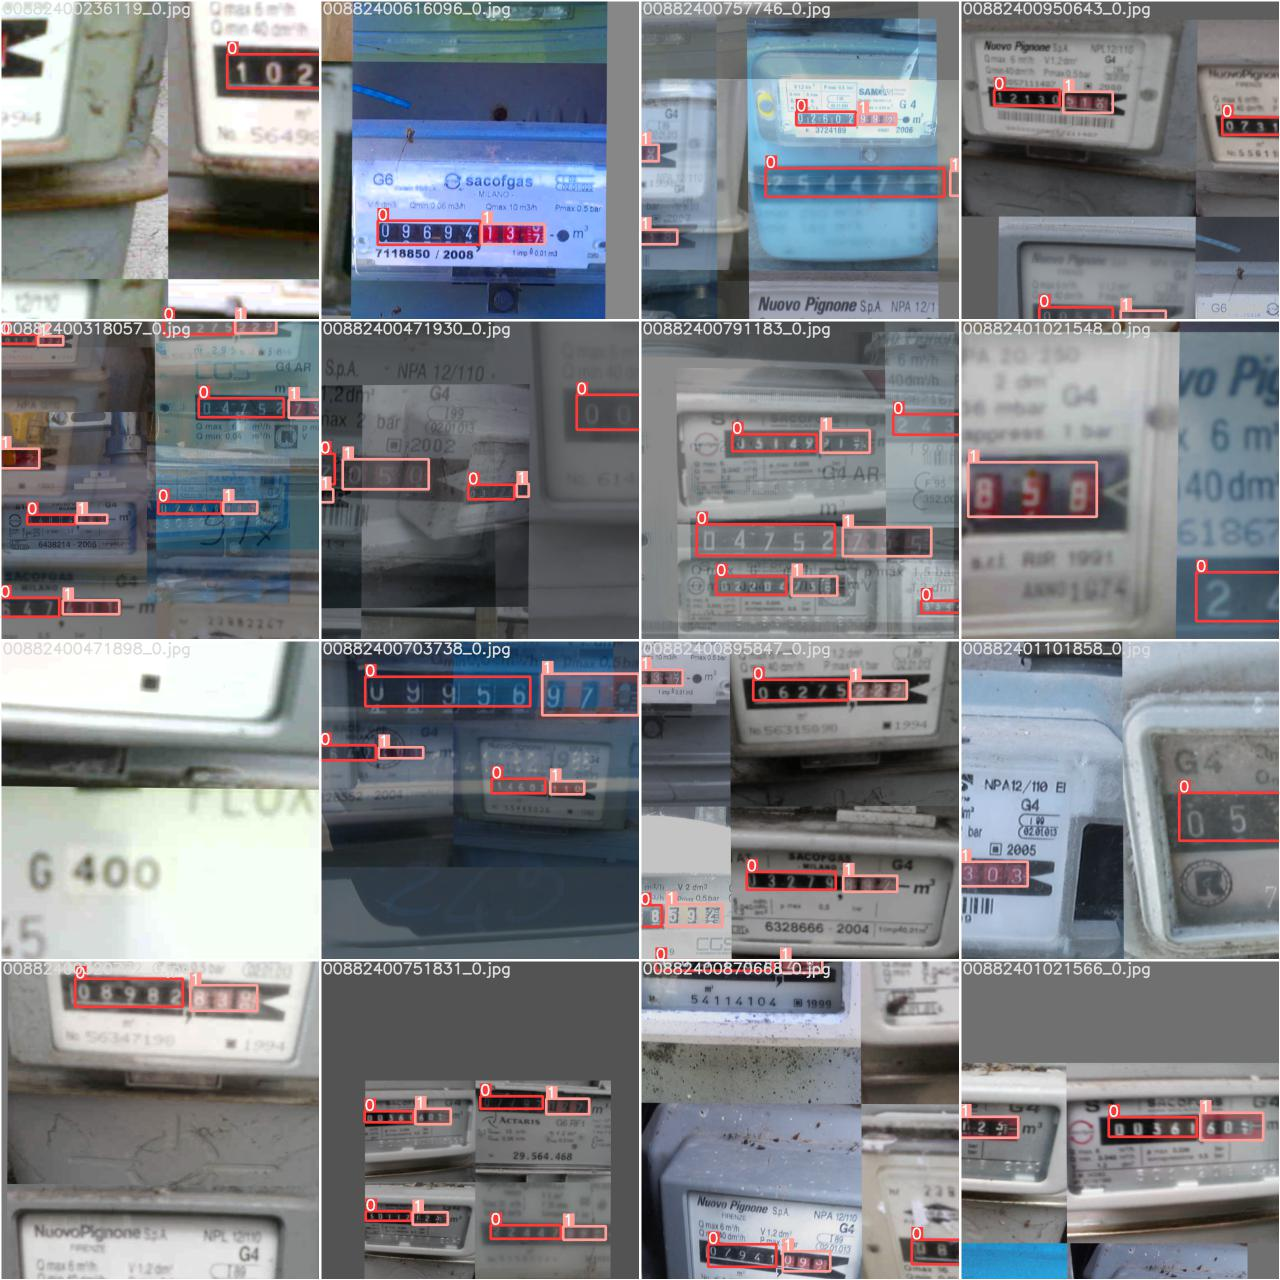

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/gdrive/MyDrive/yolo5/runs/train/exp77/train_batch1.jpg', width=900)

### valiate the model

runs/train/exp72/results.png

In [ ]:
!python yolov5/val.py --weights runs/train/exp77/weights/best.pt --data meter/meter.yaml --img 640 
#--iou 0.65 --half


python3: can't open file 'yolov5/val.py': [Errno 2] No such file or directory


### Detect

In [ ]:
cd /content/gdrive/MyDrive/yolo5

/content/gdrive/MyDrive/yolo5


In [ ]:
!python yolov5/detect.py --weights runs/train/exp77/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/meter/internet/ --save-txt  --save-crop --project training/meter/detect  
#--classes 0
# --conf-thres 0.85

detect: weights=['runs/train/exp77/weights/best.pt'], source=/content/gdrive/MyDrive/yolo5/meter/internet/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=training/meter/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/gdrive/MyDrive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-226-g6306091 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21041679 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  

### 之前训练的较高精度的模型

In [ ]:
!python yolov5/detect.py --weights runs/train/exp72/weights/best.pt  --source /content/gdrive/MyDrive/yolo5/meter/datasets/images/test/ --save-txt  --save-crop --project training/meter/detect  --classes 0


detect: weights=['runs/train/exp72/weights/best.pt'], source=/content/gdrive/MyDrive/yolo5/meter/datasets/images/test/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=[0], agnostic_nms=False, augment=False, update=False, project=training/meter/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21041679 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.

### list the crop result

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

def showImages(img_path):

 img_list=os.listdir(img_path)
 img_num=len(img_list) #计算目录下有多少图像

 w = 10
 h = 40
 fig = plt.figure(figsize=(8, 8))
 columns = 4
 rows = 8
 #img_num
 for i in range(1,4):
    path=img_path+img_list[i]
    img = plt.imread(path)
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
 plt.show()  


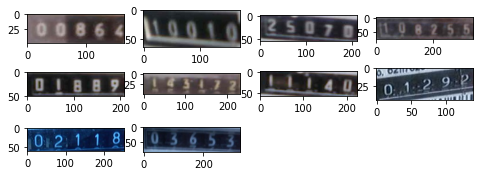

In [ ]:
showImages('/content/gdrive/MyDrive/yolo5/training/meter/detect/exp30/crops/ArteMeter/')

### evaluate model 模型性能评估

In [ ]:
!python3 yolov5/test.py --data meter/meter.yaml  --weights runs/train/exp77/weights/best.pt --augment  --conf-thre 0.55

test: data=meter/meter.yaml, weights=['runs/train/exp77/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.55, iou_thres=0.6, task=val, device=, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=False
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21041679 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
val: Scanning 'meter/datasets/labels/va

In [ ]:
mv /content/gdrive/MyDrive/yolo5/meter/datasets/labels/test/label_result/* /content/gdrive/MyDrive/yolo5/meter/datasets/labels/test/

In [ ]:
!python3 yolov5/test.py --data meter/meter_one.yaml  --weights runs/train/exp100/weights/best.pt --augment  --conf-thre 0.5

test: data=meter/meter_one.yaml, weights=['runs/train/exp100/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.5, iou_thres=0.6, task=val, device=, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=False
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 308 layers, 21037638 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
val: Scanning 'meter/datasets0/l

### 利用wandb继续训练模型

### resume training
从wandb项目中-overview, copu path

In [ ]:
!python3 yolov5/train.py --resume wandb-artifact://rachelwang/YOLOv5/1s5zbwvm 

train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyp.scratch.yaml, epochs=300, batch_size=16, img_size=[640, 640], rect=False, resume=wandb-artifact://rachelwang/YOLOv5/1s5zbwvm, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: /content/gdrive/My Drive/yolo5/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-22 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5